# Group Project - AI for Security

**Members:**
- Andrea Ferrazzano - andrea1.ferrazzano@mail.polimi.it - 10703279
- Marco Gorini - marco2.gorini@mail.polimi.it - 10710545
- Leonardo Saveri - leonardo.saveri@mail.polimi.it - 10745545
- Claudia Pierpaoli - claudia.pierpaoli@mail.polimi.it - 11016822

# Objective:
For this project, we analyzed data that involves the problem of the protection of Internet of Things (IoT) devices such as Amazon echo, Google Nest, Sonos speakers, etc. The data set comes from a real IoT network with 105 different devices.
The creators of the dataset have attacked the network in 7 different ways on a total of 33 occasions. We found that the original dataset is very large (3GB), so we started with the 5% sample provided for us and then expanded with the use of a larger part of the dataset as well as another dataset.

Since we need to classify within 8 classes, let's consider that when choosing at random, the probability of a correct classification is 12.5%. Of course we have to try to aim for a better accuracy, since we can imagine that a trained human can correctly identify all of these attacks.

## Imports

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import stats
from sklearn.model_selection import train_test_split

## A) Compute Summary Statistics

We started by importing the 5% sample of our IoT dataset and implementing some data visualization in order to better understand the data, such as the features present.

In [3]:
df_5 = pd.read_csv("data/IoT_5Percent.csv")
df_5.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.092170,16692.50,17.00,64.0,4124.115328,4124.115328,0.0,0.0,0.0,0.0,...,0.000000,50.00,8.312373e+07,9.5,10.000000,0.00000,0.000000,0.00,141.55,DDoS-UDP_Flood
1,0.152987,17635.00,17.00,64.0,3601.595667,3601.595667,0.0,0.0,0.0,0.0,...,0.000000,50.00,8.310619e+07,9.5,10.000000,0.00000,0.000000,0.00,141.55,DDoS-UDP_Flood
2,0.000000,0.00,1.00,64.0,163.479196,163.479196,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.312400e+07,9.5,9.165151,0.00000,0.000000,0.00,141.55,DDoS-ICMP_Flood
3,0.000000,54.00,6.00,64.0,6.207933,6.207933,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.333214e+07,9.5,10.392305,0.00000,0.000000,0.00,141.55,DDoS-PSHACK_Flood
4,0.006760,199.78,16.67,64.0,37.627478,37.627478,0.0,0.0,0.0,0.0,...,3.970412,177.28,8.300370e+07,9.5,18.997839,5.63636,153.637263,0.11,141.55,DoS-UDP_Flood


In [4]:
df_5.shape

(2332150, 47)

The dataset contains 2332150 entries and 47 columns. Now let's show more information about the dataset and the types of the columns.

In [5]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332150 entries, 0 to 2332149
Data columns (total 47 columns):
 #   Column           Dtype  
---  ------           -----  
 0   flow_duration    float64
 1   Header_Length    float64
 2   Protocol Type    float64
 3   Duration         float64
 4   Rate             float64
 5   Srate            float64
 6   Drate            float64
 7   fin_flag_number  float64
 8   syn_flag_number  float64
 9   rst_flag_number  float64
 10  psh_flag_number  float64
 11  ack_flag_number  float64
 12  ece_flag_number  float64
 13  cwr_flag_number  float64
 14  ack_count        float64
 15  syn_count        float64
 16  fin_count        float64
 17  urg_count        float64
 18  rst_count        float64
 19  HTTP             float64
 20  HTTPS            float64
 21  DNS              float64
 22  Telnet           float64
 23  SMTP             float64
 24  SSH              float64
 25  IRC              float64
 26  TCP              float64
 27  UDP         

There are a total of 47 columns (46 features of type float64, and 1 class label of type object). We found that the data did not contain any categorical features (only numerical ones), which will be significant for the models we apply later in the analysis. Below we checked whether we had any missing values. We are happy to see that we have none!

In [6]:
df_5.isna().sum().sum()

0

Then we searched for columns that contain binary values.

In [7]:
bool_cols = [col for col in df_5 
             if np.isin(df_5[col].dropna().unique(), [0, 1]).all()]
bool_cols

['fin_flag_number',
 'syn_flag_number',
 'rst_flag_number',
 'psh_flag_number',
 'ack_flag_number',
 'ece_flag_number',
 'cwr_flag_number',
 'HTTP',
 'HTTPS',
 'DNS',
 'Telnet',
 'SMTP',
 'SSH',
 'IRC',
 'TCP',
 'UDP',
 'DHCP',
 'ARP',
 'ICMP',
 'IPv',
 'LLC']

To see other important information about the dataset, we ran summary statistics:

In [8]:
df_5.describe()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
count,2.332150e+06,2.332150e+06,2.332150e+06,2.332150e+06,2.332150e+06,2.332150e+06,2.332150e+06,2.332150e+06,2.332150e+06,2.332150e+06,...,2.332150e+06,2.332150e+06,2.332150e+06,2.332150e+06,2.332150e+06,2.332150e+06,2.332150e+06,2.332150e+06,2.332150e+06,2.332150e+06
mean,5.757926e+00,7.714112e+04,9.072652e+00,6.634822e+01,9.091876e+03,9.091876e+03,3.048512e-06,8.665952e-02,2.077379e-01,9.049761e-02,...,1.247483e+02,3.329294e+01,1.247587e+02,8.316881e+07,9.497866e+00,1.312542e+01,4.705157e+01,3.055702e+04,9.630161e-02,1.414963e+02
std,2.857280e+02,4.637787e+05,8.956664e+00,1.403039e+01,9.990555e+04,9.990555e+04,2.209338e-03,2.813355e-01,4.056882e-01,2.868934e-01,...,2.408751e+02,1.599584e+02,2.414911e+02,1.700245e+07,8.170173e-01,8.631892e+00,2.262434e+02,3.116256e+05,2.326818e-01,2.101296e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.200000e+01,0.000000e+00,4.200000e+01,0.000000e+00,1.000000e+00,9.165151e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000e+00,5.400000e+01,6.000000e+00,6.400000e+01,2.091515e+00,2.091515e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.000000e+01,0.000000e+00,5.000000e+01,8.307156e+07,9.500000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.415500e+02
50%,0.000000e+00,5.400000e+01,6.000000e+00,6.400000e+01,1.579892e+01,1.579892e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.400000e+01,0.000000e+00,5.400000e+01,8.312452e+07,9.500000e+00,1.039230e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.415500e+02
75%,1.051811e-01,2.726300e+02,1.436000e+01,6.400000e+01,1.173987e+02,1.173987e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.405011e+01,3.719096e-01,5.406000e+01,8.334391e+07,9.500000e+00,1.039673e+01,5.059213e-01,1.344216e+00,8.000000e-02,1.415500e+02
max,1.314562e+05,9.840879e+06,4.700000e+01,2.550000e+02,8.388608e+06,8.388608e+06,2.989952e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,8.609545e+03,8.493570e+03,9.622800e+03,1.676394e+08,1.500000e+01,1.284702e+02,1.203616e+04,7.290803e+07,1.000000e+00,2.446000e+02


The summary statistics tell us various information about the features, which can be quite useful. But in order to best visualize the data and have a more in depth idea of what we will be working with, we found it best to analyze the data with visual plots and graphs, outlined in section B.

The target value we need to predict is the "label" column. In reality, we noticed that many labels were associated with overall the same type of attack, so we grouped them into more general categories, with the hope that our models could work better with less labels. Now, let's plot the distribution of these labels and create a new "category_label", which will contain the group for each single value.

In [9]:
df_5.groupby("label").size().sort_values(ascending=False)

label
DDoS-ICMP_Flood            358566
DDoS-UDP_Flood             270120
DDoS-TCP_Flood             224376
DDoS-PSHACK_Flood          204981
DDoS-SYN_Flood             203200
DDoS-RSTFINFlood           202274
DDoS-SynonymousIP_Flood    179873
DoS-UDP_Flood              166013
DoS-TCP_Flood              133466
DoS-SYN_Flood              101658
BenignTraffic               54489
Mirai-greeth_flood          49684
Mirai-udpplain              44356
Mirai-greip_flood           37752
DDoS-ICMP_Fragmentation     22633
MITM-ArpSpoofing            15414
DDoS-UDP_Fragmentation      14330
DDoS-ACK_Fragmentation      14300
DNS_Spoofing                 8846
Recon-HostDiscovery          6531
Recon-OSScan                 4983
Recon-PortScan               4110
DoS-HTTP_Flood               3663
VulnerabilityScan            1906
DDoS-HTTP_Flood              1443
DDoS-SlowLoris               1151
DictionaryBruteForce          661
BrowserHijacking              303
CommandInjection              286
SqlInjec

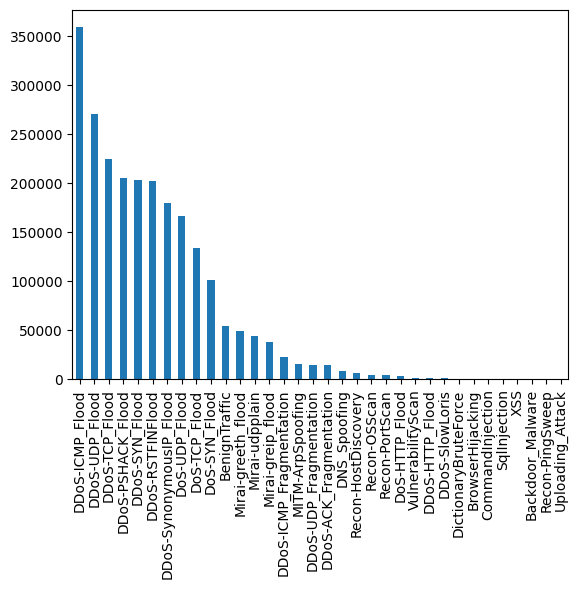

In [10]:
df_5.label.value_counts().plot(kind='bar')
plt.show()

We can see that the dataset is very unbalanced in this way. Let's now combine attacks into categories and plot again the distribution.

In [11]:
dict_8classes = {}
dict_8classes['DDoS-RSTFINFlood'] = 'DDoS'
dict_8classes['DDoS-PSHACK_Flood'] = 'DDoS'
dict_8classes['DDoS-SYN_Flood'] = 'DDoS'
dict_8classes['DDoS-UDP_Flood'] = 'DDoS'
dict_8classes['DDoS-TCP_Flood'] = 'DDoS'
dict_8classes['DDoS-ICMP_Flood'] = 'DDoS'
dict_8classes['DDoS-SynonymousIP_Flood'] = 'DDoS'
dict_8classes['DDoS-ACK_Fragmentation'] = 'DDoS'
dict_8classes['DDoS-UDP_Fragmentation'] = 'DDoS'
dict_8classes['DDoS-ICMP_Fragmentation'] = 'DDoS'
dict_8classes['DDoS-SlowLoris'] = 'DDoS'
dict_8classes['DDoS-HTTP_Flood'] = 'DDoS'

dict_8classes['DoS-UDP_Flood'] = 'DoS'
dict_8classes['DoS-SYN_Flood'] = 'DoS'
dict_8classes['DoS-TCP_Flood'] = 'DoS'
dict_8classes['DoS-HTTP_Flood'] = 'DoS'


dict_8classes['Mirai-greeth_flood'] = 'Mirai'
dict_8classes['Mirai-greip_flood'] = 'Mirai'
dict_8classes['Mirai-udpplain'] = 'Mirai'

dict_8classes['Recon-PingSweep'] = 'Recon'
dict_8classes['Recon-OSScan'] = 'Recon'
dict_8classes['Recon-PortScan'] = 'Recon'
dict_8classes['VulnerabilityScan'] = 'Recon'
dict_8classes['Recon-HostDiscovery'] = 'Recon'

dict_8classes['DNS_Spoofing'] = 'Spoofing'
dict_8classes['MITM-ArpSpoofing'] = 'Spoofing'

dict_8classes['BrowserHijacking'] = 'Web'
dict_8classes['Backdoor_Malware'] = 'Web'
dict_8classes['XSS'] = 'Web'
dict_8classes['Uploading_Attack'] = 'Web'
dict_8classes['SqlInjection'] = 'Web'
dict_8classes['CommandInjection'] = 'Web'

dict_8classes['DictionaryBruteForce'] = 'BruteForce'

dict_8classes['BenignTraffic'] = 'BenignTraffic'

In [12]:
category_labels = [dict_8classes[label] for label in df_5['label']]
df_5["category_label"] = category_labels

In [13]:
df_5.groupby("category_label").size().sort_values(ascending=False)

category_label
DDoS             1697247
DoS               404800
Mirai             131792
BenignTraffic      54489
Spoofing           24260
Recon              17640
Web                 1261
BruteForce           661
dtype: int64

Now to visualize our regrouped attacks:

<Axes: >

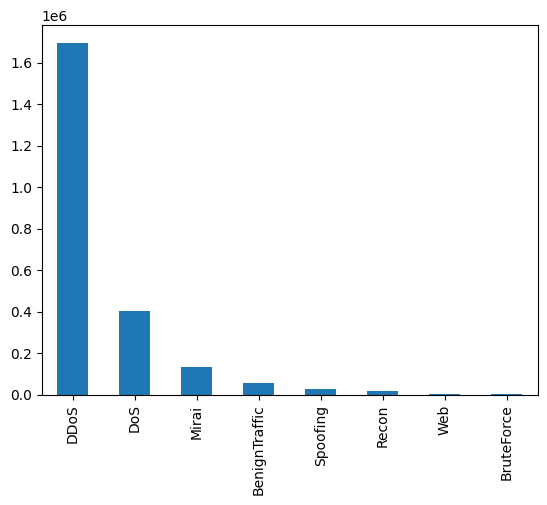

In [14]:
df_5.category_label.value_counts().plot(kind='bar')

The classes are extremely unbalanced. Thinking about the future, we would probably need a much more balanced dataset. Because we have a bigger dataset available, and the best way to deal with unbalanced data would be to collect more data (and not to undersample or oversample) we decided to create a different dataset, with 20k entries for each of the different categories. In this way we should be able to get a more balanced dataset, with real entries.

# EXTRA: Building the dataset

In [15]:
# Uncomment this to run -> run cell below to read file directly
# THIS WAS RUN ON GOOGLE COLAB TO NOT DOWLOAD EVERYTHING ON PERSONAL MACHINE, DIRECTORY ARE DIFFERENT
"""
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download madhavmalhotra/unb-cic-iot-dataset

!unzip -q /content/unb-cic-iot-dataset.zip -d .

import os
import pandas as pd

dict_8classes = {}
dict_8classes['DDoS-RSTFINFlood'] = 'DDoS'
dict_8classes['DDoS-PSHACK_Flood'] = 'DDoS'
dict_8classes['DDoS-SYN_Flood'] = 'DDoS'
dict_8classes['DDoS-UDP_Flood'] = 'DDoS'
dict_8classes['DDoS-TCP_Flood'] = 'DDoS'
dict_8classes['DDoS-ICMP_Flood'] = 'DDoS'
dict_8classes['DDoS-SynonymousIP_Flood'] = 'DDoS'
dict_8classes['DDoS-ACK_Fragmentation'] = 'DDoS'
dict_8classes['DDoS-UDP_Fragmentation'] = 'DDoS'
dict_8classes['DDoS-ICMP_Fragmentation'] = 'DDoS'
dict_8classes['DDoS-SlowLoris'] = 'DDoS'
dict_8classes['DDoS-HTTP_Flood'] = 'DDoS'

dict_8classes['DoS-UDP_Flood'] = 'DoS'
dict_8classes['DoS-SYN_Flood'] = 'DoS'
dict_8classes['DoS-TCP_Flood'] = 'DoS'
dict_8classes['DoS-HTTP_Flood'] = 'DoS'


dict_8classes['Mirai-greeth_flood'] = 'Mirai'
dict_8classes['Mirai-greip_flood'] = 'Mirai'
dict_8classes['Mirai-udpplain'] = 'Mirai'

dict_8classes['Recon-PingSweep'] = 'Recon'
dict_8classes['Recon-OSScan'] = 'Recon'
dict_8classes['Recon-PortScan'] = 'Recon'
dict_8classes['VulnerabilityScan'] = 'Recon'
dict_8classes['Recon-HostDiscovery'] = 'Recon'

dict_8classes['DNS_Spoofing'] = 'Spoofing'
dict_8classes['MITM-ArpSpoofing'] = 'Spoofing'

dict_8classes['BrowserHijacking'] = 'Web'
dict_8classes['Backdoor_Malware'] = 'Web'
dict_8classes['XSS'] = 'Web'
dict_8classes['Uploading_Attack'] = 'Web'
dict_8classes['SqlInjection'] = 'Web'
dict_8classes['CommandInjection'] = 'Web'

dict_8classes['DictionaryBruteForce'] = 'BruteForce'

dict_8classes['BenignTraffic'] = 'BenignTraffic'

df = pd.DataFrame()

for category in ['DDoS', 'DoS', 'Mirai', 'Recon', 'Spoofing', 'Web', 'BruteForce', 'BenignTraffic']:
    print('starting: ', category)
    df_cat = pd.DataFrame()
    for i in os.listdir('/content/wataiData/csv/CICIoT2023'):
        df_temp = pd.read_csv('/content/wataiData/csv/CICIoT2023/' + i)
        category_label = []
        for label in df_temp['label']:
            category_label.append(dict_7classes[label])
        df_temp['category_label'] = category_label
        df_temp = df_temp.query("category_label==@category").copy()
        df_cat = pd.concat([df_cat, df_temp])
        if len(df_cat) >= 20000:
            df = pd.concat([df, df_cat.head(20000)].copy())
            break
    if category == 'BruteForce':
        df = pd.concat([df, df_cat.head(20000)].copy())
        break

df.category_label.value_counts

df.shape

df.to_csv('/content/full_balanced_data.csv', index=None)
"""

'\n!rm -r ~/.kaggle\n!mkdir ~/.kaggle\n!mv ./kaggle.json ~/.kaggle/\n!chmod 600 ~/.kaggle/kaggle.json\n\n!kaggle datasets download madhavmalhotra/unb-cic-iot-dataset\n\n!unzip -q /content/unb-cic-iot-dataset.zip -d .\n\nimport os\nimport pandas as pd\n\ndict_8classes = {}\ndict_8classes[\'DDoS-RSTFINFlood\'] = \'DDoS\'\ndict_8classes[\'DDoS-PSHACK_Flood\'] = \'DDoS\'\ndict_8classes[\'DDoS-SYN_Flood\'] = \'DDoS\'\ndict_8classes[\'DDoS-UDP_Flood\'] = \'DDoS\'\ndict_8classes[\'DDoS-TCP_Flood\'] = \'DDoS\'\ndict_8classes[\'DDoS-ICMP_Flood\'] = \'DDoS\'\ndict_8classes[\'DDoS-SynonymousIP_Flood\'] = \'DDoS\'\ndict_8classes[\'DDoS-ACK_Fragmentation\'] = \'DDoS\'\ndict_8classes[\'DDoS-UDP_Fragmentation\'] = \'DDoS\'\ndict_8classes[\'DDoS-ICMP_Fragmentation\'] = \'DDoS\'\ndict_8classes[\'DDoS-SlowLoris\'] = \'DDoS\'\ndict_8classes[\'DDoS-HTTP_Flood\'] = \'DDoS\'\n\ndict_8classes[\'DoS-UDP_Flood\'] = \'DoS\'\ndict_8classes[\'DoS-SYN_Flood\'] = \'DoS\'\ndict_8classes[\'DoS-TCP_Flood\'] = \'DoS\'\

In [2]:
df = pd.read_csv("data/full_balanced_data.csv")
df.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label,category_label
0,3.391010,86.40,6.0,64.00,0.353898,0.353898,0.0,0.0,0.0,0.0,...,54.00,8.333083e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-PSHACK_Flood,DDoS
1,0.000000,0.00,1.0,64.00,0.995891,0.995891,0.0,0.0,0.0,0.0,...,42.00,8.313207e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood,DDoS
2,0.000000,54.69,6.0,63.78,29852.697509,29852.697509,0.0,0.0,0.0,0.0,...,54.69,8.306737e+07,9.5,10.402806,0.659309,7.245867,0.03,141.55,DDoS-TCP_Flood,DDoS
3,0.891138,91.80,6.0,64.00,2.940833,2.940833,0.0,0.0,1.0,0.0,...,54.00,8.336111e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-SynonymousIP_Flood,DDoS
4,0.000000,0.00,1.0,64.00,2.011545,2.011545,0.0,0.0,0.0,0.0,...,42.00,8.312779e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood,DDoS


In [3]:
df.groupby("category_label").size().sort_values(ascending=False)

category_label
BenignTraffic    20000
DDoS             20000
DoS              20000
Mirai            20000
Recon            20000
Spoofing         20000
Web              20000
BruteForce       13064
dtype: int64

<Axes: >

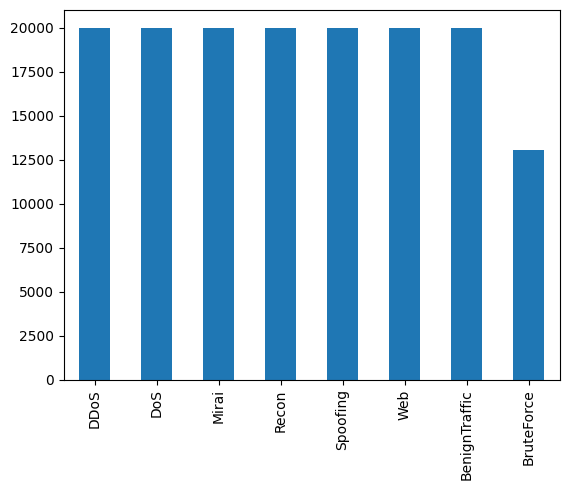

In [4]:
df.category_label.value_counts().plot(kind='bar')

By seeing the plot and the number of entries for each attack, our data is finally balanced and is ready for an exploratory data analysis. It is important to note that the BruteForce label contains less entries, because overall in the original dataset BruteForce didn't contain as many entries compared to the other labels.

## EXTRA: Extracting the final test set

In [5]:
from sklearn.model_selection import train_test_split

df_DDoS = df[df['category_label'] == 'DDoS'].copy()
df_DoS = df[df['category_label'] == 'DoS'].copy()
df_Mirai = df[df['category_label'] == 'Mirai'].copy()
df_Recon = df[df['category_label'] == 'Recon'].copy()
df_Spoofing = df[df['category_label'] == 'Spoofing'].copy()
df_BenignTraffic = df[df['category_label'] == 'BenignTraffic'].copy()
df_Web = df[df['category_label'] == 'Web'].copy()
df_BruteForce = df[df['category_label'] == 'BruteForce'].copy()

dfs = [df_DDoS, df_DoS, df_Mirai, df_Recon, df_Spoofing, df_BenignTraffic, df_Web, df_BruteForce]
dfs_use = []
dfs_final_test = []

for df in dfs:
    df_train, df_test = train_test_split(df, train_size=10000, random_state=42)
    dfs_use.append(df_train)
    dfs_final_test.append(df_test)

df = pd.concat(dfs_use)
df_test = pd.concat(dfs_final_test)

<Axes: >

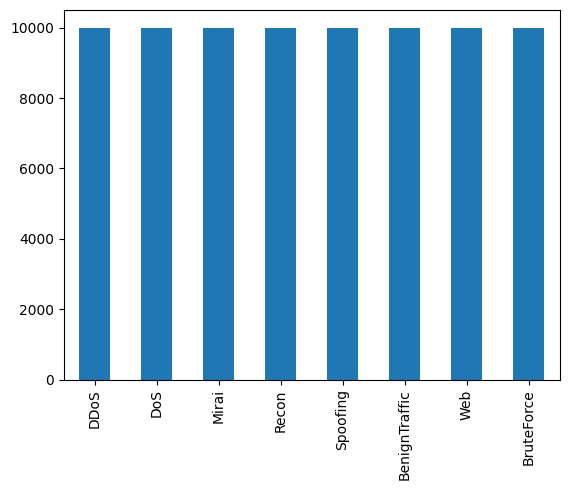

In [6]:
df.category_label.value_counts().plot(kind='bar')

<Axes: >

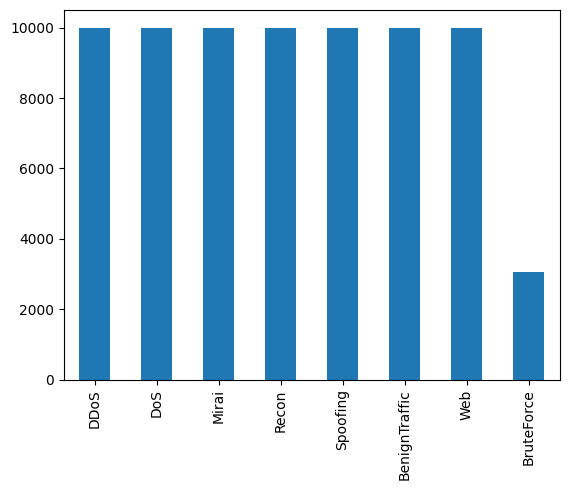

In [7]:
df_test.category_label.value_counts().plot(kind='bar')

In [8]:
df_test.to_csv("data/final_test_data.csv", index=None)

We will not be touching this final test data, and use it to evaluate the final classifiers.

## B) Visualize the data:
We begin by importing the necessary libraries:

In [9]:
import seaborn as sns
from ipywidgets import interact, widgets

In this section, we want to see if any of our features contain significant outliers and data that might be unneccesary for our analysis and that may skew our results. 

In [10]:
columns = df.drop(['label', 'category_label'], axis=1).columns

### Box Plot & Histogram

In [11]:
def create_boxplot(df):
    def plot(column):
        plt.figure(figsize=(6, 4))
        sorted_categories = sorted(df['category_label'].unique())
        sns.boxplot(x='category_label', y=column, data=df, order=sorted_categories)
        plt.title(f'Boxplot for {column}')
        plt.xticks(rotation=45)
        plt.show()

    columns = df.drop(['label', 'category_label'], axis=1).columns
    dropdown_menu = widgets.Dropdown(options=columns, description='Select Column')

    interact(plot, column=dropdown_menu)

In [12]:
def create_hist(df):
    def plot(column):
        plt.figure(figsize=(12, 16))
        columns_per_row = 2
        unique_categories = sorted(df['category_label'].unique())
        num_categories = len(unique_categories)
        num_rows = (num_categories + columns_per_row - 1) // columns_per_row
        
        overall_min = df[column].min()
        overall_max = df[column].max()

        for i, category in enumerate(unique_categories, start=1):
            plt.subplot(num_rows, columns_per_row, i)
            
            
            bins = 50 
            bin_edges = [overall_min + (overall_max - overall_min) * j / bins for j in range(bins + 1)]
            sns.histplot(df[df['category_label'] == category][column], bins=bin_edges, kde=True)
            plt.title(f'Histogram for {column} - {category}')
            plt.xlabel(column)
            plt.ylabel('Frequency')

        plt.tight_layout()
        plt.show()

    columns = df.drop(['label', 'category_label'], axis=1).columns
    dropdown_menu = widgets.Dropdown(options=columns, description='Select Column')

    interact(plot, column=dropdown_menu)

In [13]:
create_boxplot(df)

interactive(children=(Dropdown(description='Select Column', options=('flow_duration', 'Header_Length', 'Protoc…

As part of the visualization of the data, we can determine the minimum and maximum values, median, and the quartiles for each label.

In [14]:
create_hist(df)

interactive(children=(Dropdown(description='Select Column', options=('flow_duration', 'Header_Length', 'Protoc…

Above we created histograms to best visualize the distribution of the data based on the different labels.

To best determine what features to drop, we also created a correlation matrix to see what features might be correlated with each other. When two features are correlated they usually have almost the same impact on the prediction, so one can be dropped. 

/var/folders/5c/228d25ts5q930z1l80pxc9qh0000gn/T/ipykernel_59455/936854839.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cbar=True, cmap='Blues')


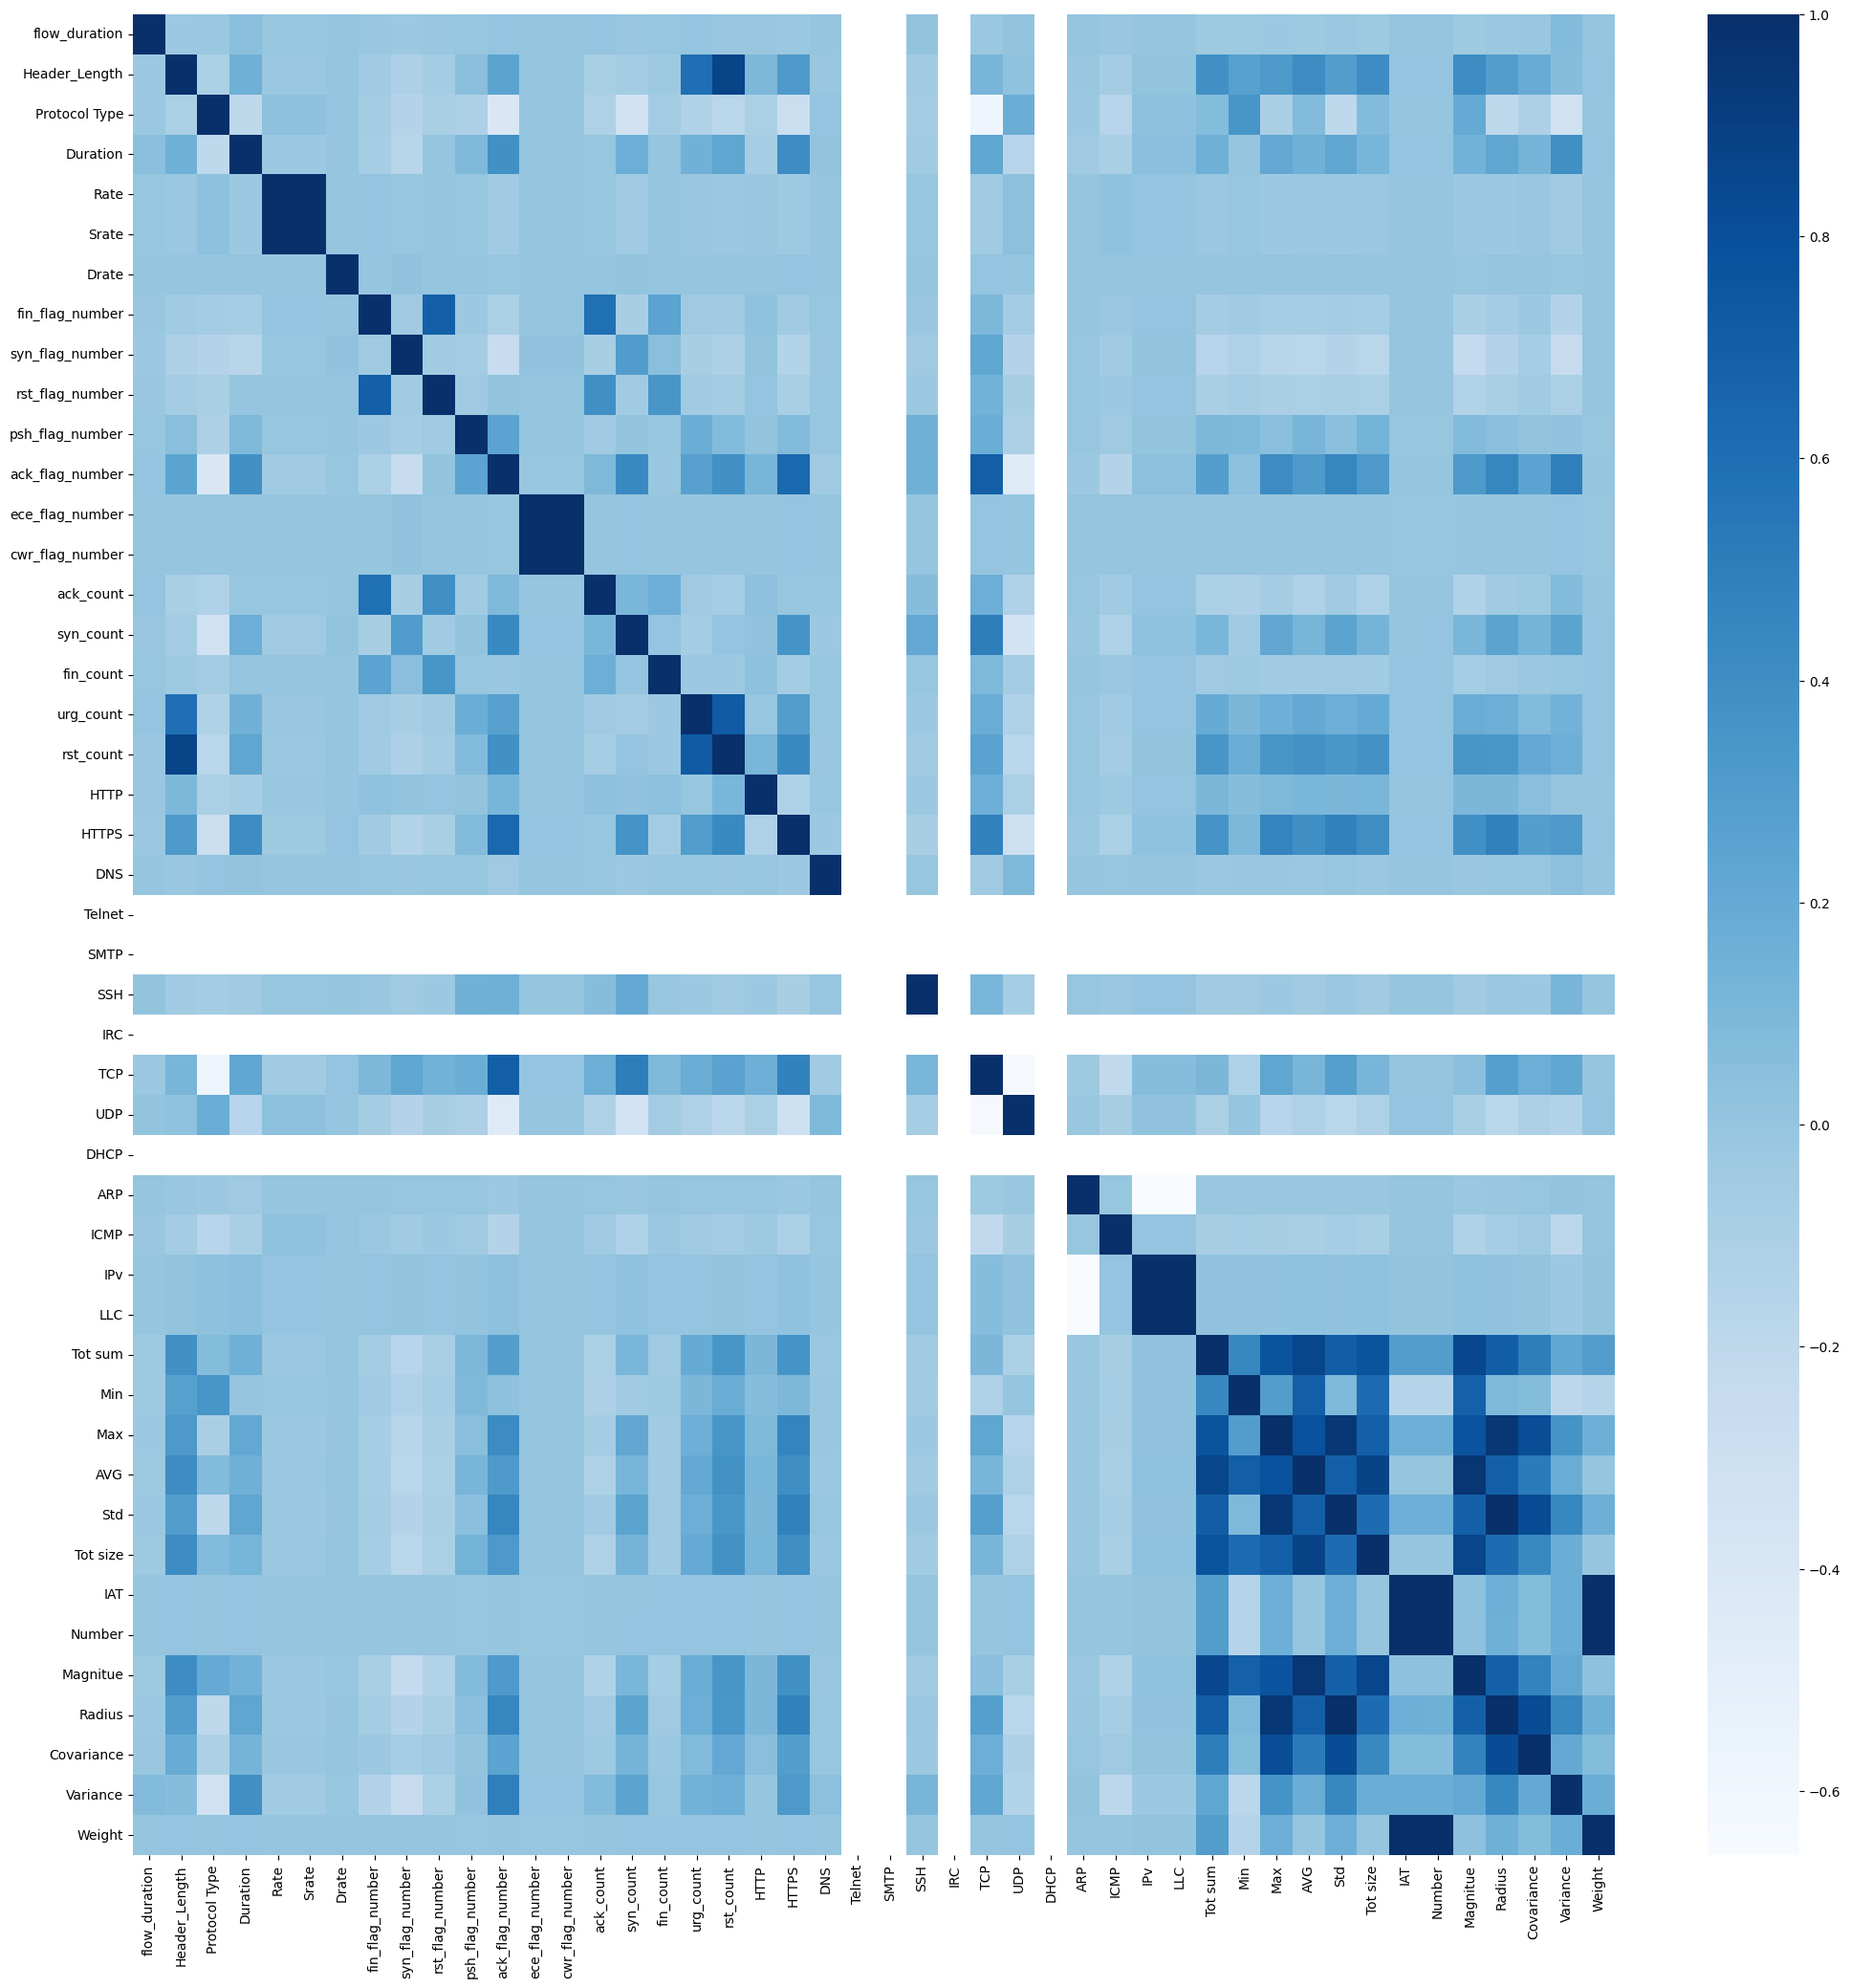

In [15]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), cbar=True, cmap='Blues')
plt.show()

## Train-Test Split

Let's now split the dataframe into the training and testing data, so that we can work on removing some outliers/features from the training data alone.

In [16]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

<Axes: >

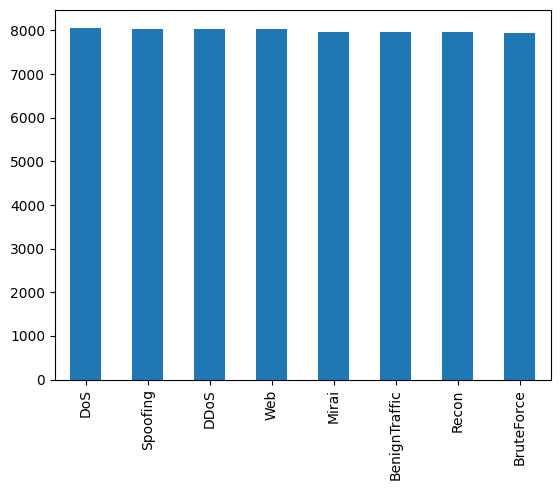

In [17]:
df_train.category_label.value_counts().plot(kind='bar')

<Axes: >

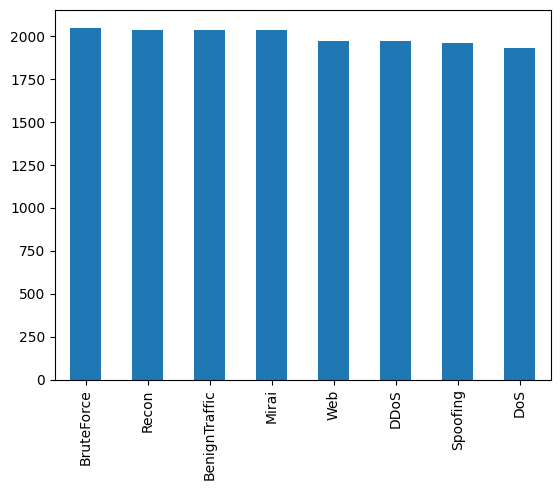

In [18]:
df_test.category_label.value_counts().plot(kind='bar')

The training and testing data contains 8000 entries and 2000 entries respectively.

In order to logically remove outliers based on the label, working with dataframes we divided for each label. This is also essential in order to avoid accidentally removing outliers for the benign values. Then to proceed we removed the columns that had mainly one value.


In [19]:
df_DDoS = df_train[df_train['category_label'] == 'DDoS'].copy()
df_DoS = df_train[df_train['category_label'] == 'DoS'].copy()
df_Mirai = df_train[df_train['category_label'] == 'Mirai'].copy()
df_Recon = df_train[df_train['category_label'] == 'Recon'].copy()
df_Spoofing = df_train[df_train['category_label'] == 'Spoofing'].copy()
df_BenignTraffic = df_train[df_train['category_label'] == 'BenignTraffic'].copy()
df_Web = df_train[df_train['category_label'] == 'Web'].copy()
df_BruteForce = df_train[df_train['category_label'] == 'BruteForce'].copy()

dfs = [df_DDoS, df_DoS, df_Mirai, df_Recon, df_Spoofing, df_BenignTraffic, df_Web, df_BruteForce]

In [20]:
df_noOut = pd.DataFrame()
for df_small in dfs:
    Q1 = df_small.quantile(0.05, numeric_only=True)
    Q3 = df_small.quantile(0.95, numeric_only=True)
    IQR = Q3 - Q1
    df__small_noOut= df_small[~((df_small<(Q1-1.5*IQR))|(df_small>(Q3+1.5*IQR))).any(axis=1)]
    df_noOut = pd.concat([df_noOut, df__small_noOut])


/var/folders/5c/228d25ts5q930z1l80pxc9qh0000gn/T/ipykernel_59455/430521404.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df__small_noOut= df_small[~((df_small<(Q1-1.5*IQR))|(df_small>(Q3+1.5*IQR))).any(axis=1)]
/var/folders/5c/228d25ts5q930z1l80pxc9qh0000gn/T/ipykernel_59455/430521404.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df__small_noOut= df_small[~((df_small<(Q1-1.5*IQR))|(df_small>(Q3+1.5*IQR))).any(axis=1)]
/var/folders/5c/228d25ts5q930z1l80pxc9qh0000gn/T/ipykernel_59455/430521404.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `lef

In [21]:
df_noOut

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label,category_label
9216,0.179236,34353.0,17.0,64.0,5381.270971,5381.270971,0.0,0.0,0.0,0.0,...,50.0,8.309874e+07,9.5,10.000000,0.000000,0.000000,0.0,141.55,DDoS-UDP_Flood,DDoS
8745,0.000000,54.0,6.0,64.0,3.500237,3.500237,0.0,0.0,0.0,0.0,...,54.0,8.307247e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55,DDoS-TCP_Flood,DDoS
767,0.000000,54.0,6.0,64.0,1.964445,1.964445,0.0,1.0,0.0,1.0,...,54.0,8.334505e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55,DDoS-RSTFINFlood,DDoS
4240,0.056592,24416.0,17.0,64.0,8687.939069,8687.939069,0.0,0.0,0.0,0.0,...,50.0,8.309854e+07,9.5,10.000000,0.000000,0.000000,0.0,141.55,DDoS-UDP_Flood,DDoS
1553,0.141661,41525.0,17.0,64.0,5861.688641,5861.688641,0.0,0.0,0.0,0.0,...,50.0,8.310643e+07,9.5,10.000000,0.000000,0.000000,0.0,141.55,DDoS-UDP_Flood,DDoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146738,29.741062,2474.7,5.4,89.8,0.843541,0.843541,0.0,0.0,0.0,0.0,...,75.8,1.666014e+08,13.5,20.869937,328.053795,53972.480847,1.0,244.60,DictionaryBruteForce,BruteForce
148186,32.902408,4817.0,5.9,70.3,2.185764,2.185764,0.0,0.0,0.0,0.0,...,268.2,1.666013e+08,13.5,19.926096,259.399693,35165.118743,1.0,244.60,DictionaryBruteForce,BruteForce
142819,151.224092,7710.7,8.1,100.9,8.198359,8.198359,0.0,0.0,0.0,0.0,...,79.5,1.666013e+08,13.5,13.066891,66.793175,2241.983920,1.0,244.60,DictionaryBruteForce,BruteForce
147482,52.893145,61552.7,6.0,60.6,64.318027,64.318027,0.0,0.0,0.0,0.0,...,1138.0,1.666014e+08,13.5,47.619821,1349.119123,914883.417976,1.0,244.60,DictionaryBruteForce,BruteForce


<Axes: >

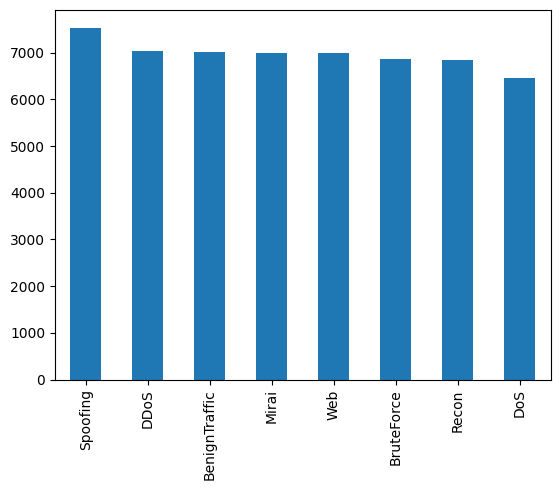

In [22]:
df_noOut.category_label.value_counts().plot(kind="bar")

In [23]:
nunique = df_noOut.nunique()
cols_to_drop = nunique[nunique == 1].index
df_noOut.drop(cols_to_drop, axis=1, inplace = True)
#df_noOut.sum()

In [24]:
df_noOut.shape

(55749, 37)

In [25]:
create_boxplot(df_noOut)

interactive(children=(Dropdown(description='Select Column', options=('flow_duration', 'Header_Length', 'Protoc…

In [26]:
create_hist(df_noOut)

interactive(children=(Dropdown(description='Select Column', options=('flow_duration', 'Header_Length', 'Protoc…

Now let's see how the dataset and the distributions have changed. Looking at the duration label, the boxplots show less outliers compared to the original dataset. 

In [27]:
df_noOut.groupby("category_label").size().sort_values(ascending=False)

category_label
Spoofing         7541
DDoS             7032
BenignTraffic    7018
Mirai            7005
Web              6991
BruteForce       6872
Recon            6839
DoS              6451
dtype: int64

We just dropped columns that have the same values, now we look for the columns that have a correlation higher than 95%.

/var/folders/5c/228d25ts5q930z1l80pxc9qh0000gn/T/ipykernel_59455/2255078016.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix= df_noOut.corr()


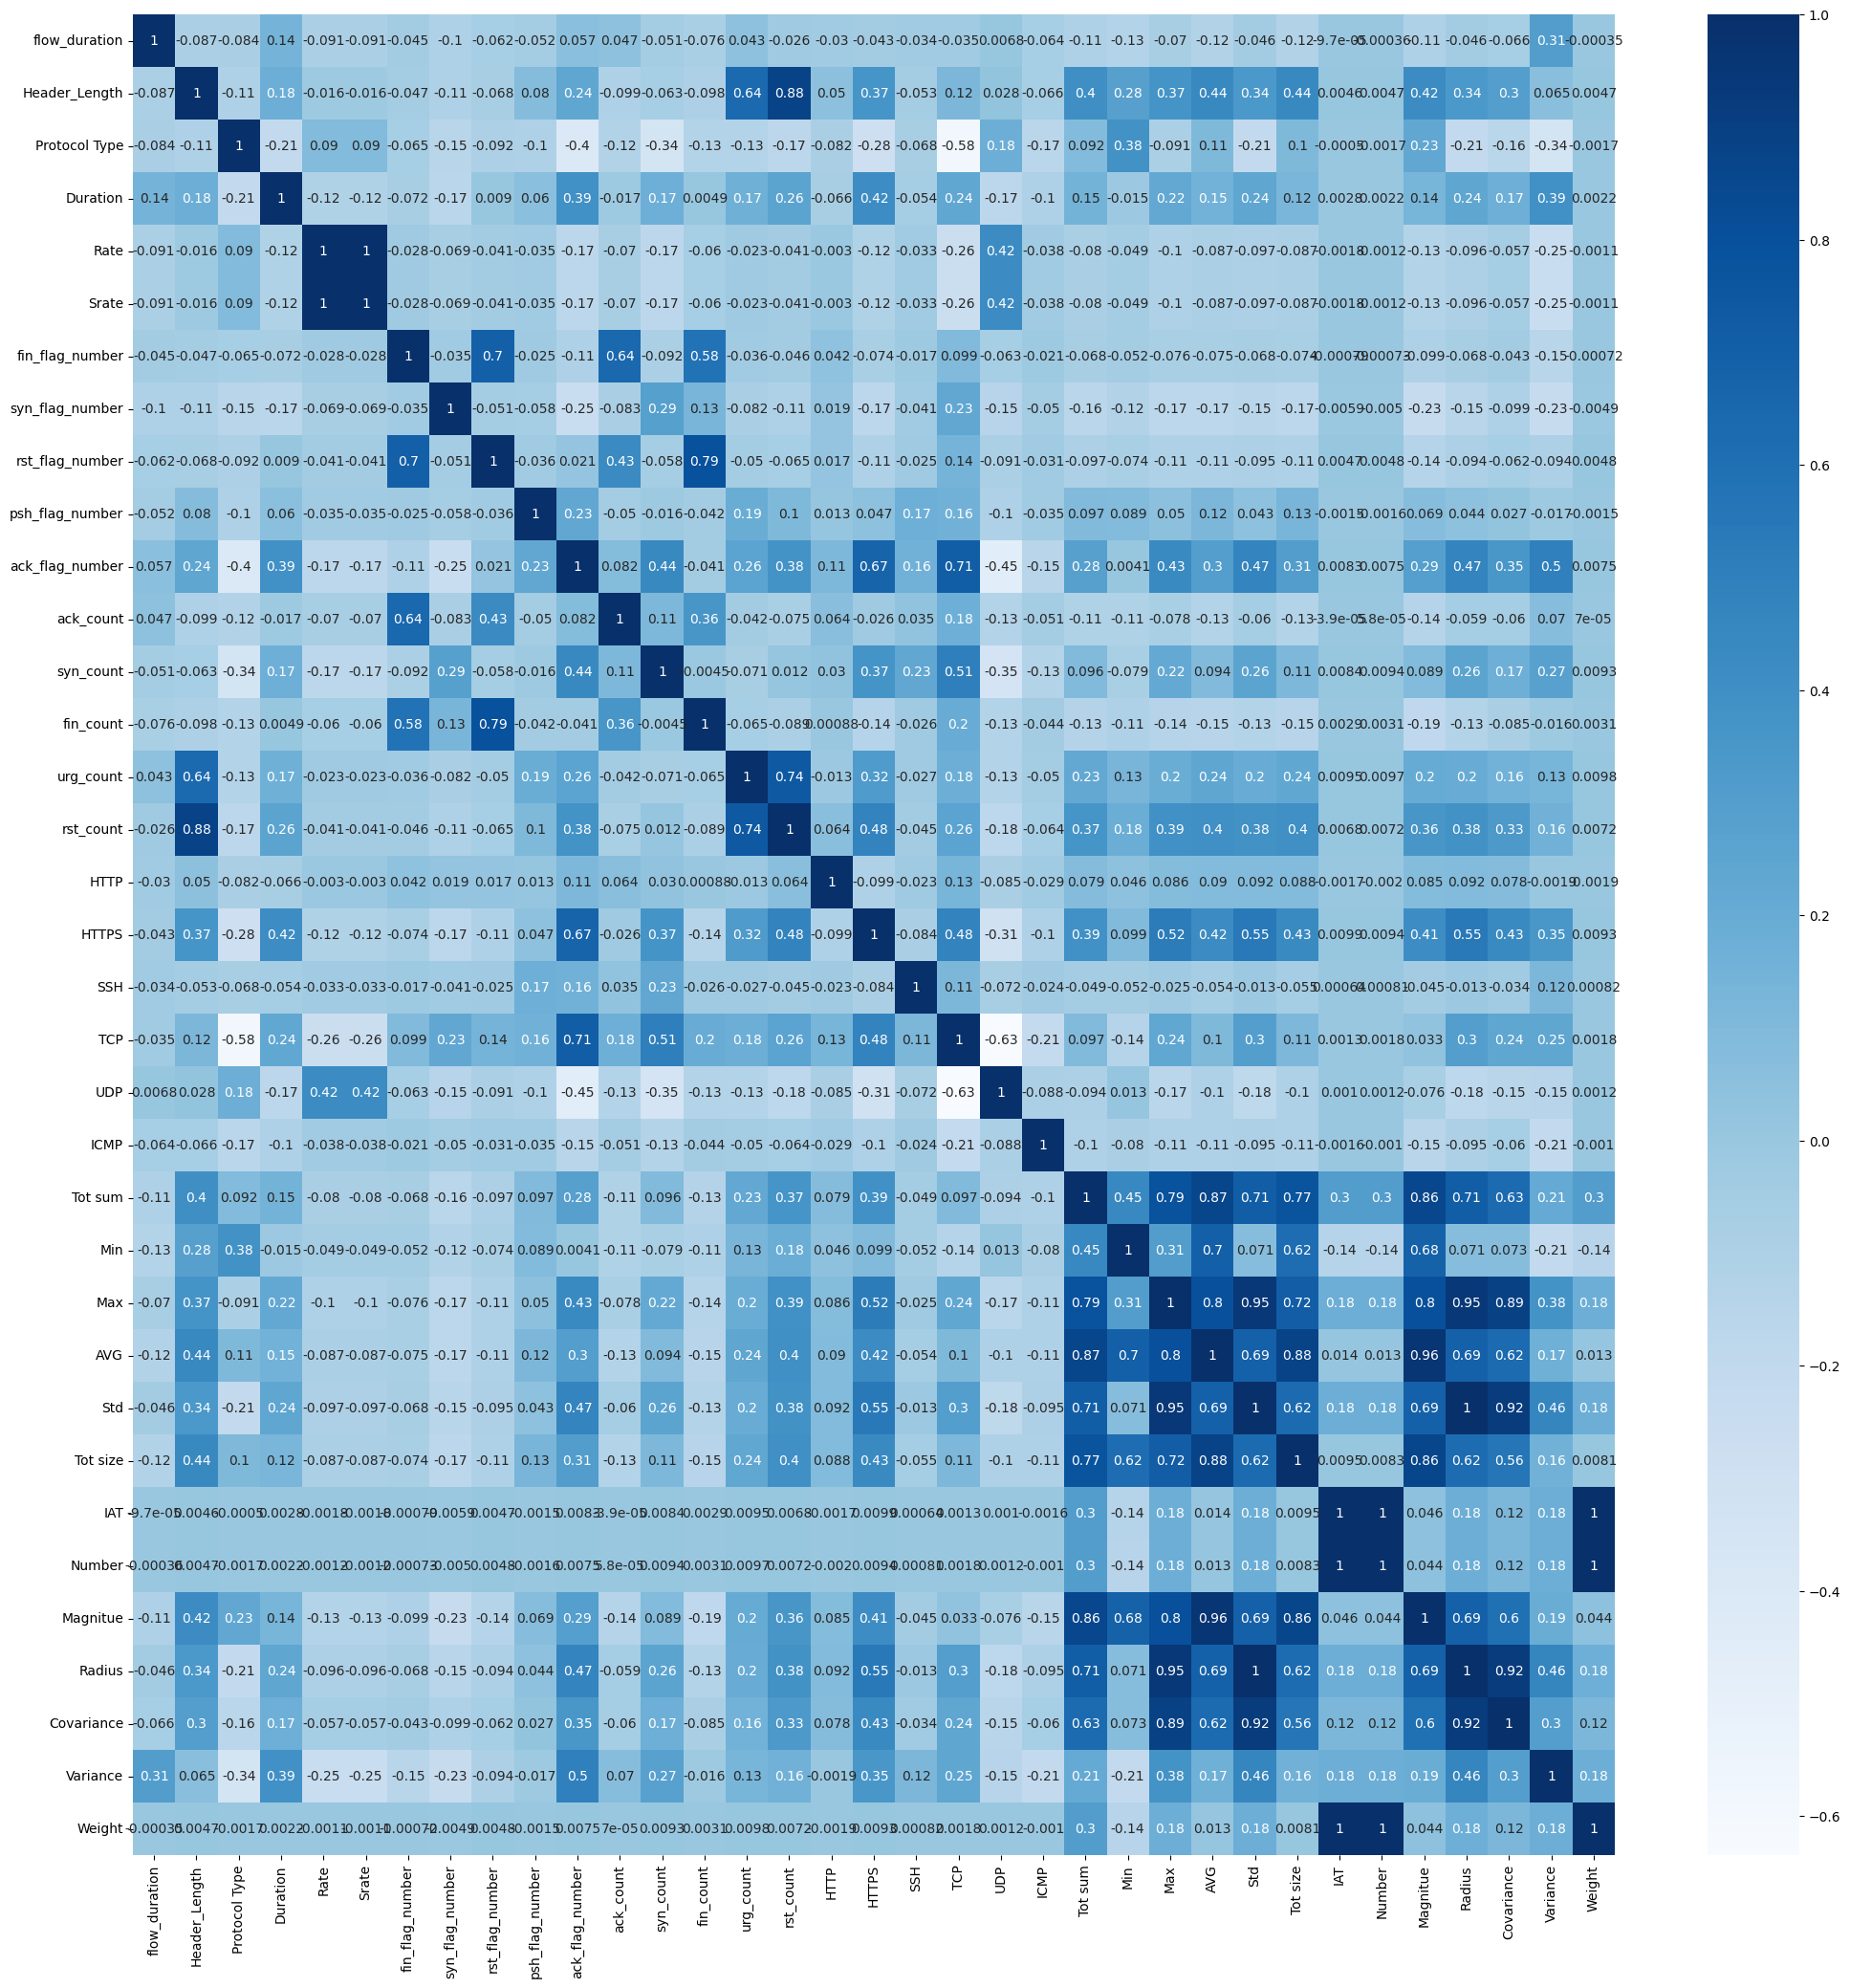

In [28]:
corr_matrix= df_noOut.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr_matrix, annot= True, cbar=True, cmap='Blues')
plt.show()

In [29]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

df_noOut.drop(to_drop, axis=1, inplace=True)

The columns with a correlation higher than 95% have now been dropped; We can now visualize the altered correlation matrix. 

/var/folders/5c/228d25ts5q930z1l80pxc9qh0000gn/T/ipykernel_59455/2255078016.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix= df_noOut.corr()


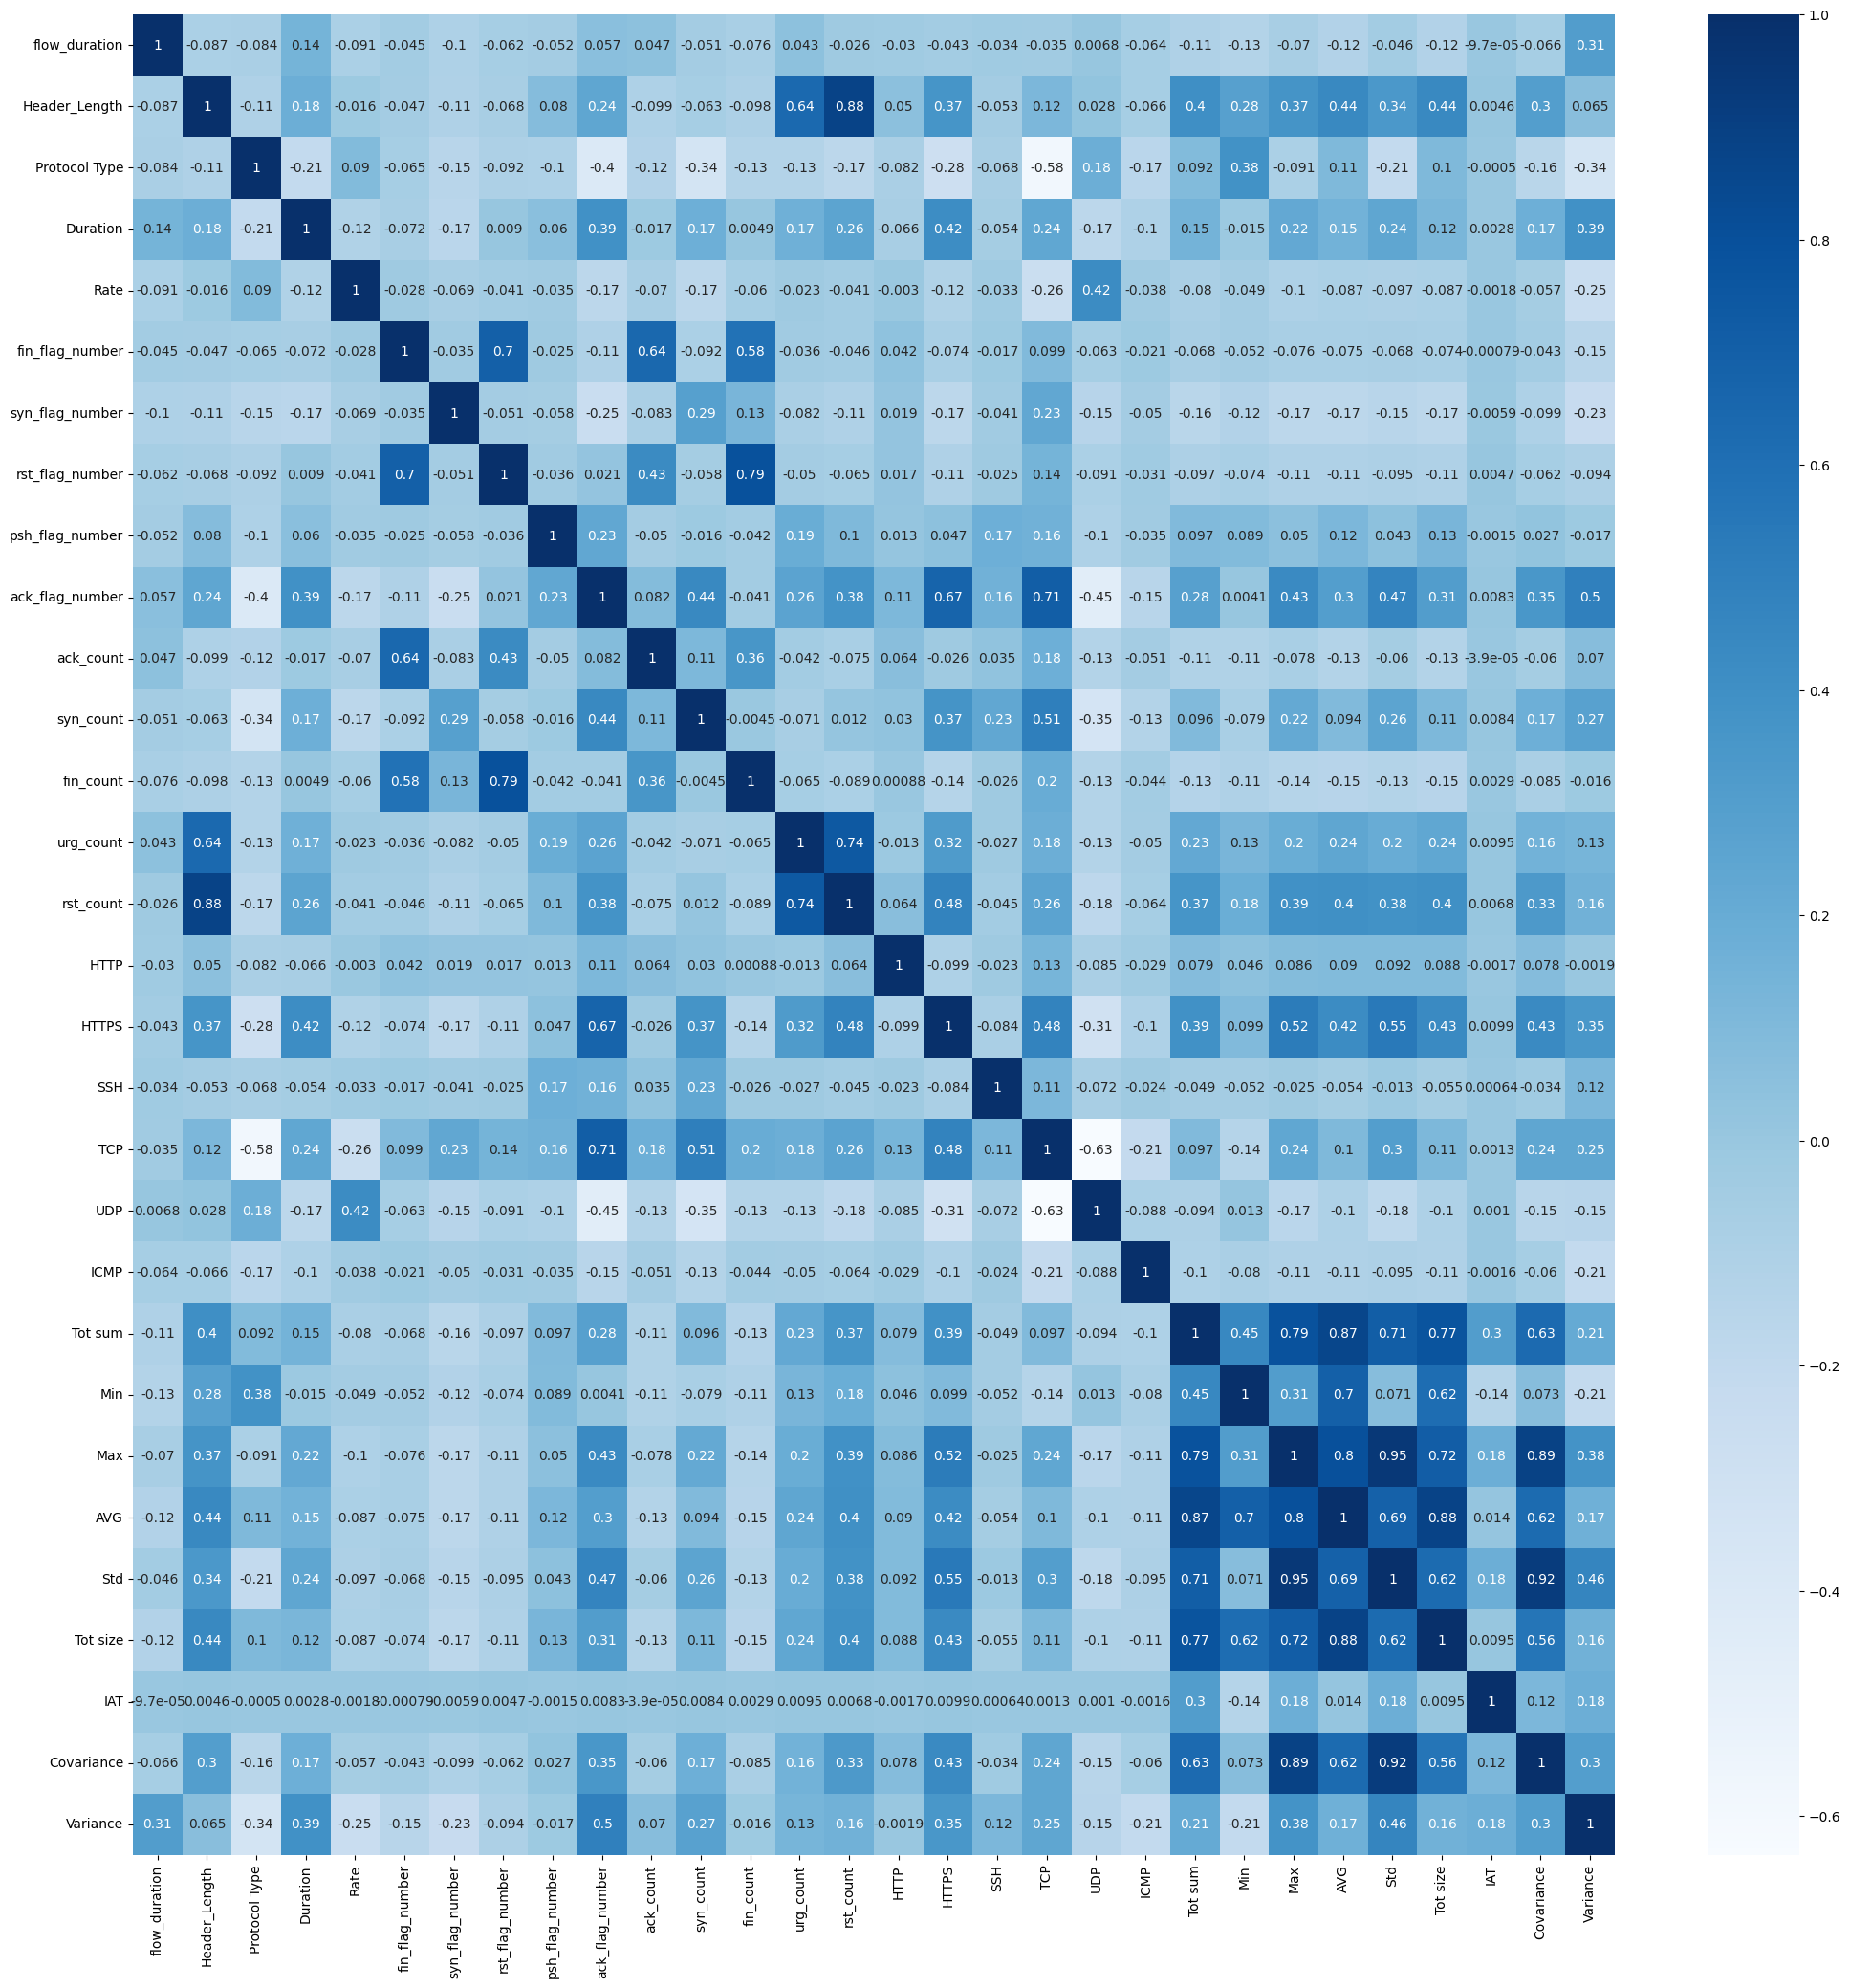

In [30]:
corr_matrix= df_noOut.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr_matrix, annot= True, cbar=True, cmap='Blues')
plt.show()

In [31]:
df_noOut.shape

(55749, 32)

In [32]:
create_boxplot(df_noOut)

interactive(children=(Dropdown(description='Select Column', options=('flow_duration', 'Header_Length', 'Protoc…

In [33]:
create_hist(df_noOut)

interactive(children=(Dropdown(description='Select Column', options=('flow_duration', 'Header_Length', 'Protoc…

In [34]:
df_noOut.to_csv("data/df_train.csv", index=None)

In [35]:
df_test[df_noOut.columns].to_csv("data/df_test.csv", index=None)

We now have df_train, df_test, df_test_final. Df_train contains the data we will use to train our classifiers that have undergone feature selection and outlier removal. df_test contains a small sample of data that hasn't been processed and that will be used for evaluating our classifiers while we do parameter selection. Df_test_final contains a large sample of the unprocessed data to evaluate the best classifiers that we will find. 